# Práctico 3 - Procesamiento Digital de Imágenes

In [1]:
from scipy.stats import norm
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,4))
    plt.grid(alpha=0.3)

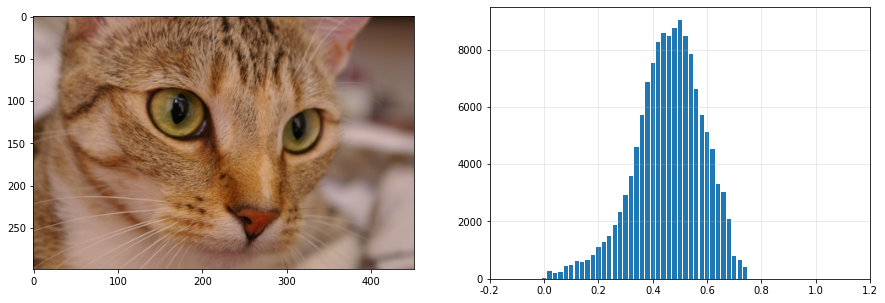

In [3]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb, 'gray', vmin=0, vmax=1)
plot_hist(img_rgb, 50, axes[1])

# 1. Normalizar histograma al rango [0,1]

Definir una función que normalice el histograma de valores de la imagen al rango [0,1]. Si la imagen es RGB, debe normalizar el histograma de luminancias.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


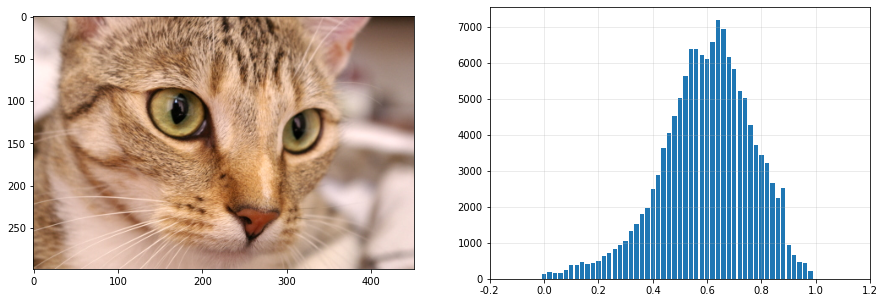

In [4]:
img_RGB_Original = imageio.imread('imageio:chelsea.png')/255 # Guardo la imagen RGB normalizada

img_RGB = img_RGB_Original      # Creo una var auxiliar para manipular la imagen
img_YIQ = rgb2yiq(img_RGB)      # cambio de espacio cromatico
img_Y = rgb2yiq(img_RGB)[:,:,0] # separo el canal Y

img_Y = img_Y - img_Y.min() # modifico el histograma
img_Y = img_Y / img_Y.max() # modifico el histograma
img_YIQ[:,:,0] = img_Y      # asigno a la imagen el canal Y modificado
img_RGB = yiq2rgb(img_YIQ)  # cambio a espacio cromatico RGB

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_RGB, vmin=0, vmax=1)                  # plot de la img RGB modificada
plot_hist(rgb2yiq(img_RGB)[:,:,0], 50, axes[1])          # hist de la img modificada (luminancias)

## 1.1 Normalizar histograma usando percentiles

Definir una función que normalice el histograma de valores de la imagen de modo que el pixel del percentil P valga 0 y el pixel del percentil 100-P valga 1. Los valores entre los percentiles 0 y P valdrán 0 y los valores entre los percentiles 100-P y 100 valdrán 1. Si la imagen es RGB, normalizar el histograma de luminancias.

NOTA: para calcular percentiles usar np.percentile()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


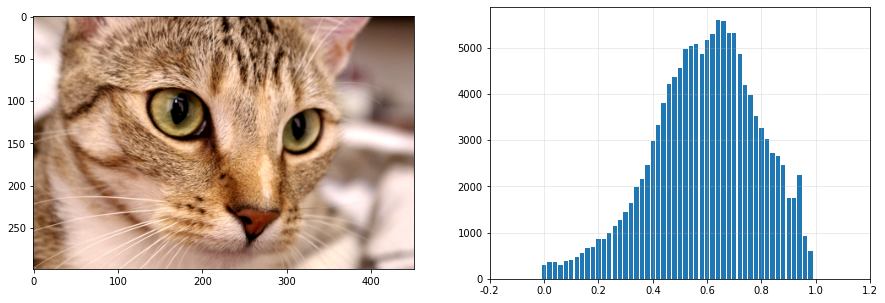

In [5]:
img_RGB_Original = imageio.imread('imageio:chelsea.png')/255 # Guardo la imagen RGB normalizada

img_RGB = img_RGB_Original      # Creo una var auxiliar para manipular la imagen
img_YIQ = rgb2yiq(img_RGB)      # cambio de espacio cromatico
img_Y = rgb2yiq(img_RGB)[:,:,0] # separo el canal Y
P=1 # valor de p
img_Y = img_Y - np.percentile(img_Y, P) # modifico el histograma
img_Y = img_Y / np.percentile(img_Y, 100-P) # modifico el histograma
img_YIQ[:,:,0] = img_Y      # asigno a la imagen el canal Y modificado
img_RGB = yiq2rgb(img_YIQ)  # cambio a espacio cromatico RGB

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_RGB, vmin=0, vmax=1)                  # plot de la img RGB modificada
plot_hist(rgb2yiq(img_RGB)[:,:,0], 50, axes[1])          # hist de la img modificada (luminancia)

## 2. Corrección gamma

1. Definir una función que aplique la corrección gamma a una imagen. Si la imagen es RGB, debe aplicar la corrección sobre la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] (con min y max o con percentiles) y luego aplicar corrección gamma.


Como sugerencia, pasarle como parámetro un valor $\alpha$ de manera que $\gamma$ se calcule como:

$\gamma = 2^{-\alpha}$

De esta manera, cuando $\alpha=1 \rightarrow \gamma=1/2$, y cuando $\alpha=-1 \rightarrow \gamma=2$. Entonces, para $\alpha>0$ la luminosidad aumenta y para $\alpha<0$ disminuye.

0.7613882352941176 0.014792156862745097


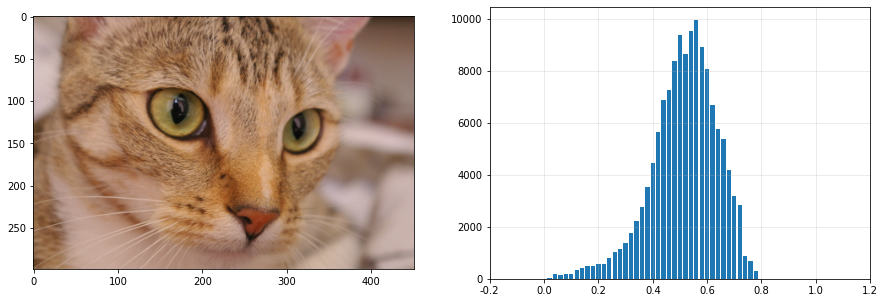

In [6]:
img_RGB_Original = imageio.imread('imageio:chelsea.png')/255 # Guardo la imagen RGB normalizada

img_RGB = img_RGB_Original      # Creo una var auxiliar para manipular la imagen
img_YIQ = rgb2yiq(img_RGB)      # cambio de espacio cromatico
img_Y = rgb2yiq(img_RGB)[:,:,0] # separo el canal Y

print(img_Y.max(), img_Y.min())

alpha = 0.25
gamma = pow(2,-alpha)
img_Y = np.power(img_Y, gamma) # modifico el histograma


img_YIQ[:,:,0] = img_Y      # asigno a la imagen el canal Y modificado
img_RGB = yiq2rgb(img_YIQ)  # cambio a espacio cromatico RGB

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_RGB, vmin=0, vmax=1)                  # plot de la img RGB modificada
plot_hist(rgb2yiq(img_RGB)[:,:,0], 50, axes[1])          # hist de la img modificada

# 3. Modificación del histograma por una función definida a tramos

1. Definir una función que tome una imagen y dos arreglos $x$ e $y$ que definan una función no-lineal en el rango $0\leq x,y\leq 1$ y aplique la función a la intensidad de los pixeles de la imagen. Si la imagen es RGB debe aplicar la función a la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] y luego aplicar corrección gamma.

Ayuda: La función np.interp() puede facilitarle la tarea

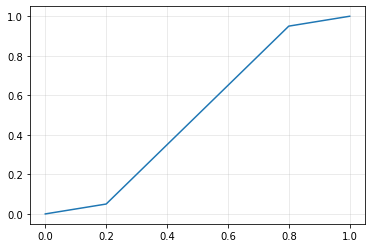

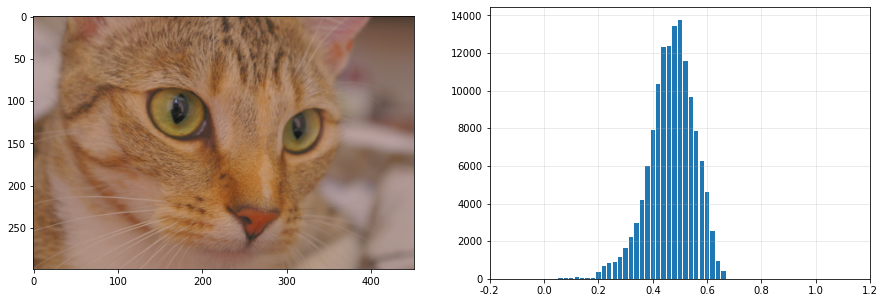

In [7]:
x = np.array([0, 0.2,  0.8,  1])
y = np.array([0, 0.05, 0.95, 1])

plt.plot(x, y)
plt.grid(alpha=0.3)

img_RGB_Original = imageio.imread('imageio:chelsea.png')/255 # Guardo la imagen RGB normalizada

img_RGB = img_RGB_Original      # Creo una var auxiliar para manipular la imagen
img_YIQ = rgb2yiq(img_RGB)      # cambio de espacio cromatico
img_Y = rgb2yiq(img_RGB)[:,:,0] # separo el canal Y

img_Y = np.interp(img_Y, y, x)  # modifico el histograma

img_YIQ[:,:,0] = img_Y      # asigno a la imagen el canal Y modificado
img_RGB = yiq2rgb(img_YIQ)  # cambio a espacio cromatico RGB

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_RGB, vmin=0, vmax=1)                  # plot de la img RGB modificada
plot_hist(rgb2yiq(img_RGB)[:,:,0], 50, axes[1])          # hist de la img modificada

# 4. Uniformalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución uniforme. 
2. Normalizar el histograma al rango [0,1] y uniformalizar su distribución

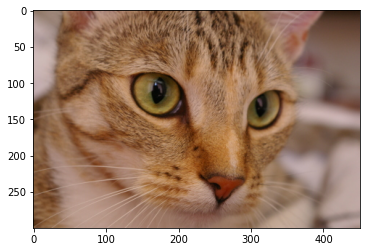

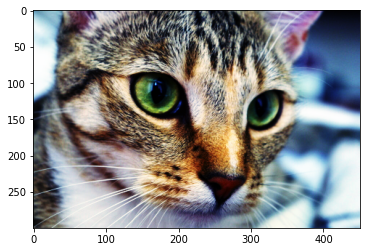

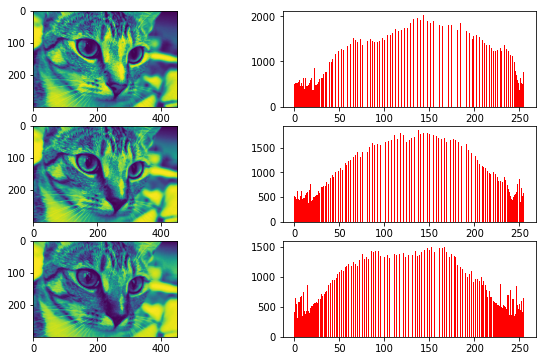

In [8]:
img_RGB_Original = imageio.imread('imageio:chelsea.png')  # Guardo la imagen RGB
plt.imshow(img_RGB_Original)
plt.show()

img_RGB = img_RGB_Original
# Separo los canales
img_R = img_RGB_Original[:,:,0]  # Guardo el canal R
img_G = img_RGB_Original[:,:,1]  # Guardo el canal G
img_B = img_RGB_Original[:,:,2]  # Guardo el canal B

def eqHistograma(canal):
	# Genera el histograma del canal
	hist, _ = np.histogram(canal.flatten(), 256, [0, 256])
	# Genera la distribucion acumulada
	cdf = hist.cumsum()
	# Saca los valores igual a cero para despues calcular el menor valor sin que este sea cero
	cdf_masked = np.ma.masked_equal(cdf, 0)
	# Aplica la transformacion de ecualizacion
	cdf_masked = ( cdf_masked - cdf_masked.min() )*255/( cdf_masked.max() - cdf_masked.min() )
	#Rellena los valores previamente enmascarados con ceros
	cdf = np.ma.filled(cdf_masked,0).astype('uint8')
	#Aplica la ecualización a los píxeles de la imagen original
	resultado = cdf[canal]
	return resultado
 
img_R_eq = eqHistograma(img_R) 
img_G_eq = eqHistograma(img_G) 
img_B_eq = eqHistograma(img_B)

# Imagen modificada
img_RGB[:,:,0] = img_R_eq
img_RGB[:,:,1] = img_G_eq
img_RGB[:,:,2] = img_B_eq

plt.imshow(img_RGB)
plt.show()

fig, ax = plt.subplots(3,2)
fig.set_size_inches(10,6)

ax[0,0].imshow(img_R_eq)
ax[1,0].imshow(img_G_eq)
ax[2,0].imshow(img_B_eq)

ax[0,1].hist(img_R_eq.flatten(),256,[0,256], color = 'r')
ax[1,1].hist(img_G_eq.flatten(),256,[0,256], color = 'r')
ax[2,1].hist(img_B_eq.flatten(),256,[0,256], color = 'r')

plt.show()

# 5. Normalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución normal. 
2. Normalizar el histograma al rango [0,1] y normalizar su distribución.

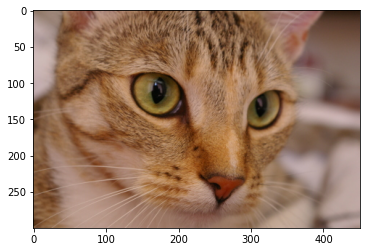

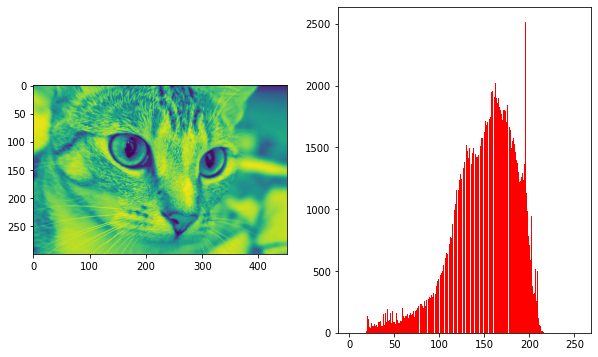

In [23]:
img_RGB_Original = imageio.imread('imageio:chelsea.png')  # Guardo la imagen RGB
plt.imshow(img_RGB_Original)
plt.show()

img_RGB = img_RGB_Original
# Separo los canales
img_R = img_RGB_Original[:,:,0]  # Guardo el canal R
img_G = img_RGB_Original[:,:,1]  # Guardo el canal G
img_B = img_RGB_Original[:,:,2]  # Guardo el canal B

def normHist(canal):
    # Sacado de wikipedia
    # https://en.wikipedia.org/wiki/Normalization_(image_processing)
    nMax = 255 # Nuevo Max
    nmin = 0 # Nuevo Min
    alpha = 50 # Ancho de la funcion
    beta = 256/2 # centro de la funcion
    
    return (( nMax - nmin )/( 1 + np.exp(-(canal-beta)/alpha) )) + nmin



fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,6)

ax[0].imshow(normHist(img_R))

ax[1].hist(normHist(img_R).flatten(),256,[0,256], color = 'r')

plt.show()